# Task-2 : Explore Supervised Machine Learning with Student's scores Dataset

## By Smitkumar Panchal

### Importing Libraries

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Loading Data from file

In [215]:
df = pd.read_csv('student_scores.csv')
x_test = pd.DataFrame(df['Hours']) # --> Independent Variable
y_test = pd.DataFrame(df['Scores'])# --> Dependent Variable 
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Model Training

In [216]:
model = LinearRegression().fit(x_test , y_test)
# Regular Eqaution of Line : Y = mX + c
m = model.coef_  # --> Coefficient of model means slope of line
c = model.intercept_ #--> intercept of model means Intersection with axis Y
y_train = (m*x_test) +c # --> y = mX + c

### Visualisation 

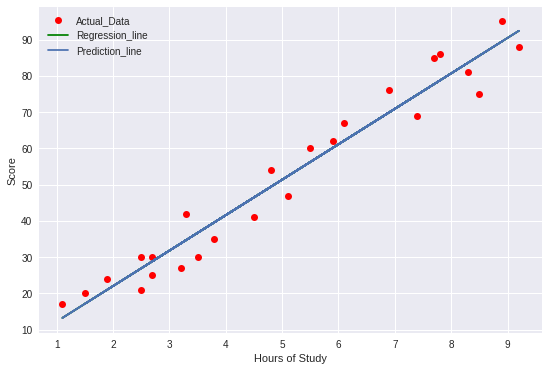

In [217]:
plt.figure(figsize = (9 , 6))
plt.style.use('seaborn')
plt.plot(x_test , y_test , 'ro' , label = "Actual_Data")
plt.plot(x_test , y_train , 'g-' , label = "Regression_line")
plt.plot(x_test , model.predict(x_test) , label = "Prediction_line")
plt.xlabel("Hours of Study")
plt.ylabel("Score")
plt.legend()
plt.show()

In [218]:
print("Accuracy of model is " , (model.score(x_test , y_test)) * 100)

Accuracy of model is  95.29481969048355


In [219]:
prediction = model.predict(pd.DataFrame([9.25]))
print("Predicted score on 9.25 hours study:",prediction[0][0])

Predicted score on 9.25 hours study: 92.90985477015731


##  With Gradient-Descent Algo ( From Scratch )  :

In [220]:
m = len(df['Hours'])
x_train = np.array(df['Hours']).reshape(m , 1)
y_train2 = np.array(df['Scores']).reshape(m , 1)

### Linear Regression Algorithm:
#### 1)initialize parameters such as a means theta1 and b means theta0
#### 2) for i = 0 to iterations:
            Apply Gradient decent
            compute gradients of cost wrt a and b
            compute cost function 
            compute cost just for checking whether it is strictly decreasing or not        
#### 3) now you have final parameters theta and b, so make your predict function, hx = theta*X + b

In [221]:
## a = theta1
## b = theta0
## hx = h(x)

def initialize_parameters(): #--> Initialising parameters by array of zeros 
    parameters = {}
    parameters['a'] = np.zeros((1,1)) # --> a means theta1
    parameters['b'] = np.zeros((1,1)) # --> b means theta0
    return parameters
def hx(para , x): # -->  Finding hypothesis means h(x)
    hx = (np.dot( x , para['a'])) + para['b'] # --> h(x) = aX + b      |     (theta0 + X * theta1)
    return hx
def derivatives(para , m , x , y): # --> Derivatives of theta0  and theta1
    deriv = {}
    h = hx(para , x)
    deriv['db'] = (np.sum(h - y)) / m # --> d(theta0)
    deriv['da'] = (np.dot(x.T , h-y)) / m # --> d(theta1)
    return deriv
def cost_function(para , m , x , y): # --> Cost Function to find total cost of function 
    h = hx(para , x)
    J = sum(np.square(h - y))*0.5/m
    return J
def parameter_updating(para , deriv , lr): # -->  Updating parameters by learning rate 
    para['a'] -= lr * deriv['da']
    para['b'] -= lr * deriv['db']
    return para

In [222]:
def Linear_Regression_model(para , x , y , m , lr , iterations):
    Jall = []
    for i in range(1 , iterations+1):
        der = derivatives(para , m , x_train , y_train2)
        para = parameter_updating(para , der , lr)
        J = cost_function(para , m , x_train , y_train2)
        Jall.append(J)
        #print("Iteration no {} cost is {}".format(i , J))
    return para , Jall

In [223]:
para = initialize_parameters()
para , Jall = Linear_Regression_model(para , x_train , y_train2 , m , 0.05 , 1000)

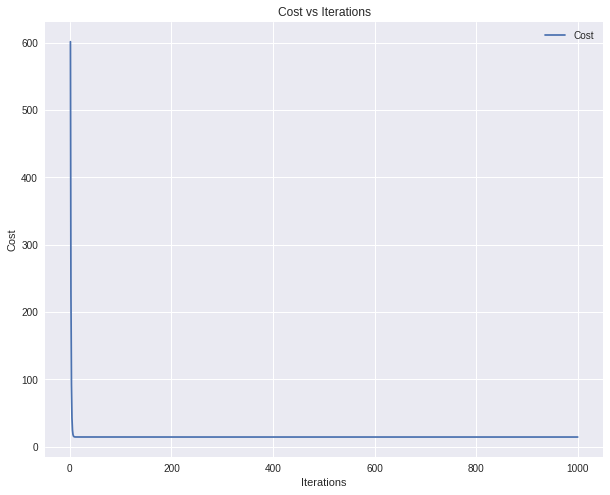

In [224]:
plt.figure(figsize = (10 ,8))
plt.style.use('seaborn')
plt.plot(list(range(1,len(Jall)+1)) , Jall , label = 'Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.legend()
plt.show()

In [225]:
print("Slope(Theta0) :" , para['a'][0][0])
print("intercept(Theta1) :" , para['b'][0][0])
predicted = hx(para , x_train) # --> Finding Predicted value of Scores form actual data of Hours to find R2 Value

# --> By r square method Finding the accuracy
r = (sum(np.square(predicted - np.mean(y_train2)))) / (sum(np.square(y_train2 - np.mean(y_train2)))) 
print("Accuracy of From Scratch Model is :" , r[0]*100)   

Slope(Theta0) : 9.775813088829391
intercept(Theta1) : 2.483613324307109
Accuracy of From Scratch Model is : 95.29500876419597


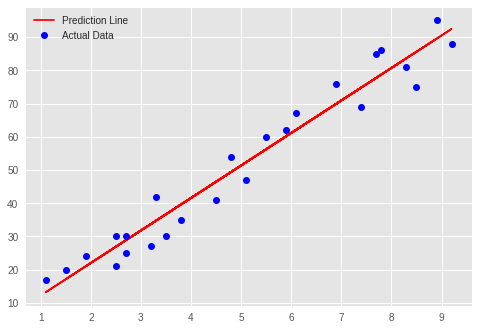

In [226]:
plt.style.use('ggplot')
plt.plot(x_train , predicted , 'r-' , label = 'Prediction Line')
plt.plot(x_train , y_train2 , 'bo' , label = 'Actual Data')
plt.legend()
plt.show()

In [227]:
Final_prediction = hx(para , 9.25)
print("Predicted score on 9.25 hours study:" , Final_prediction[0][0])

Predicted score on 9.25 hours study: 92.90988439597898
